In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [534]:
df = pd.read_csv("study_performance.csv")

In [535]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [537]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


# Sözel Sütunlar

## Fonksiyonlar

In [538]:
def encode_column(df, column_name, drop=False):

    from sklearn.preprocessing import LabelEncoder

    # Create an instance of LabelEncoder
    le = LabelEncoder()
    
    # Create a new column with the encoded values
    df[column_name + '_encoded'] = le.fit_transform(df[column_name])
    
    # If drop is True, drop the original column
    if drop:
        df = df.drop(columns=[column_name])
    
    return df

## Gender

In [539]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [540]:
df = encode_column(df, "gender", drop = True)
df.head()

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_encoded
0,group B,bachelor's degree,standard,none,72,72,74,0
1,group C,some college,standard,completed,69,90,88,0
2,group B,master's degree,standard,none,90,95,93,0
3,group A,associate's degree,free/reduced,none,47,57,44,1
4,group C,some college,standard,none,76,78,75,1


## Race Ethnicity

In [541]:
df["race_ethnicity"].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [542]:
df = encode_column(df, "race_ethnicity", drop = True)
df.head()

,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_encoded,race_ethnicity_encoded
0,bachelor's degree,standard,none,72,72,74,0,1
1,some college,standard,completed,69,90,88,0,2
2,master's degree,standard,none,90,95,93,0,1
3,associate's degree,free/reduced,none,47,57,44,1,0
4,some college,standard,none,76,78,75,1,2


## Parentel Level of Education

In [543]:
df["parental_level_of_education"].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [544]:
df[df["parental_level_of_education"] == "some high school"] = "high school"
df["parental_level_of_education"].value_counts()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16608\1588826618.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'high school' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df["parental_level_of_education"] == "some high school"] = "high school"
C:\Users\Asus\AppData\Local\Temp\ipykernel_16608\1588826618.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'high school' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df[df["parental_level_of_education"] == "some high school"] = "high school"


parental_level_of_education
high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

some college

In [545]:
df = df[ df["parental_level_of_education"] != "some college" ]

In [546]:
df = encode_column(df, "parental_level_of_education", drop= True)
df.head()

,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_encoded,race_ethnicity_encoded,parental_level_of_education_encoded
0,standard,none,72,72,74,0,1,1
2,standard,none,90,95,93,0,1,3
3,free/reduced,none,47,57,44,1,0,0
5,standard,none,71,83,78,0,1,0
8,free/reduced,completed,64,64,67,1,3,2


## Lunch

In [547]:
df["lunch"].value_counts()

lunch
standard        380
free/reduced    215
high school     179
Name: count, dtype: int64

In [548]:
df = encode_column(df, "lunch", drop = True)
df.head()

,test_preparation_course,math_score,reading_score,writing_score,gender_encoded,race_ethnicity_encoded,parental_level_of_education_encoded,lunch_encoded
0,none,72,72,74,0,1,1,2
2,none,90,95,93,0,1,3,2
3,none,47,57,44,1,0,0,0
5,none,71,83,78,0,1,0,2
8,completed,64,64,67,1,3,2,0


## Test Preparation Course

In [549]:
df["test_preparation_course"].value_counts()

test_preparation_course
none           391
completed      204
high school    179
Name: count, dtype: int64

In [550]:
df = encode_column(df, "test_preparation_course", drop=True)
df.head()

,math_score,reading_score,writing_score,gender_encoded,race_ethnicity_encoded,parental_level_of_education_encoded,lunch_encoded,test_preparation_course_encoded
0,72,72,74,0,1,1,2,2
2,90,95,93,0,1,3,2,2
3,47,57,44,1,0,0,0,2
5,71,83,78,0,1,0,2,2
8,64,64,67,1,3,2,0,0


# Sayısal Sütunlar

In [551]:
df = df[ df["math_score"] != "high school" ]

# Model Oluşturma

In [552]:
from sklearn.model_selection import train_test_split # Veri setini eğitim ve test setlerine ayırmak için
from sklearn.linear_model import LinearRegression # Lineer regresyon modeli

In [553]:
model = LinearRegression()

In [554]:
y = df['reading_score'].values # hedef değişkenimiz
x = df.drop('reading_score', axis=1).values # bağımsız değişkenlerimiz

In [555]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 2)

In [556]:
model.fit(x_train, y_train)

LinearRegression()

# Model Değerlendirme

In [557]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Hata metrikleri

In [558]:
y_pred = model.predict(x_test)

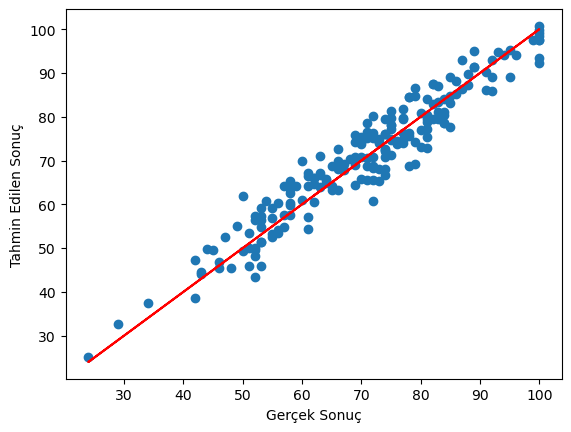

In [564]:
plt.scatter(y_test,y_pred)
plt.xlabel('Gerçek Sonuç')
plt.ylabel('Tahmin Edilen Sonuç')

plt.plot(y_test, y_test, 'red')

In [561]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(x_test, y_test)

print(f"Ortalama Mutlak Hata: {mae}")
print(f"Ortalama Kareli Hata: {mse}")
print(f"R^2 Değeri: {r2}")

Ortalama Mutlak Hata: 3.513663691419371
Ortalama Kareli Hata: 18.190845887237092
R^2 Değeri: 0.9192432898549513
